In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import deque
import random
import random
import pygame
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, ion, show
from pettingzoo import AECEnv
from pettingzoo.utils import agent_selector
from gym.spaces import Discrete
import time

pygame 2.6.1 (SDL 2.28.4, Python 3.12.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
#autoreload
%load_ext autoreload
%autoreload 2


In [139]:
from env import PettingZooGridWorld


MAX_STEPS = 1000
GRID_SIZE = 10

###############################################################################################
# RUN RANDOM POLICY : AT EACH TIME STEP EVERY AGENTS SAMPLES AN ACTION AT RANDOM

  #we do this random policy 5 times to get a sense of the variance
env = PettingZooGridWorld(GRID_SIZE)
env.reset()


cum_reward = None
# Run the environment for 100 steps
for _ in range(MAX_STEPS):
    # Get the current agent
    agent = env.agent_selector.next()
    # Take a random action for the current agent
    action = env.action_spaces[agent].sample()
    
    # Step the environment
    observations, rewards, dones, infos = env.step({agent: action})
    
    #cum_reward is a dict with agent names as keys
    #increase by rewards

    if cum_reward is None:
        cum_reward = rewards
    else:
        for agent in env.agents:
            cum_reward[agent] += rewards[agent]
    # Render the environment
    env.render()
    
    # Wait for a short time to slow down the animation

print(f"the cumulative reward for pred_1 is {cum_reward['pred_1']}")

the cumulative reward for pred_1 is 137.04365903274584


In [145]:
cum_reward

{'prey_1': 0,
 'prey_2': 0,
 'pred_1': 137.04365903274584,
 'pred_2': 182.4149517149508}

In [143]:
x = env.render(mode="rgb_array")
#imgdata = pygame.surfarray.array3d(x)
#plt.imshow(imgdata)
x

<Surface(500x500x32 SW)>

In [137]:
env.agent_positions

{'prey_1': (5, 5), 'prey_2': (9, 5), 'pred_1': (4, 0), 'pred_2': (1, 8)}

In [132]:
env.agent_selector.next()

'prey_1'

In [144]:
None + 2

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [136]:
env.agents

['prey_1', 'prey_2', 'pred_1', 'pred_2']

In [45]:
np.array(env.grid).T

array([[' ', ' ', ' ', ' ', ' '],
       [' ', '#', ' ', ' ', ' '],
       [' ', ' ', ' ', ' ', ' '],
       ['#', ' ', ' ', ' ', ' '],
       [' ', ' ', ' ', ' ', ' ']], dtype='<U1')

MovieWriter imagemagick unavailable; using Pillow instead.


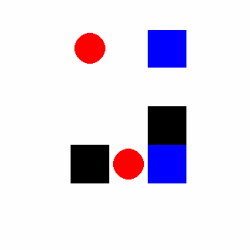

In [163]:
from human_policy import HumanPolicy, demo_policy,save_frames_as_gif
frames,_ = demo_policy(1000,5)
gif_path = save_frames_as_gif(frames, method_name='human')
from IPython.display import Image
Image(open(gif_path,'rb').read())

In [166]:
_

{'prey_1': 0,
 'prey_2': 0,
 'pred_1': 463.21666666666516,
 'pred_2': 426.199999999999}